In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import detect_activity as dt

In [6]:
import pandas as pd

practice2_df = pd.read_csv('../Data Files/Practice 2_data2.csv')

df_1 = pd.read_csv('../Data Files/one day_one_spider_1.csv')
df_2 = pd.read_csv('../Data Files/many days one spider_2.csv')
df_3 = pd.read_csv('../Data Files/many days three spiders_3.csv')

# Tests with practice data

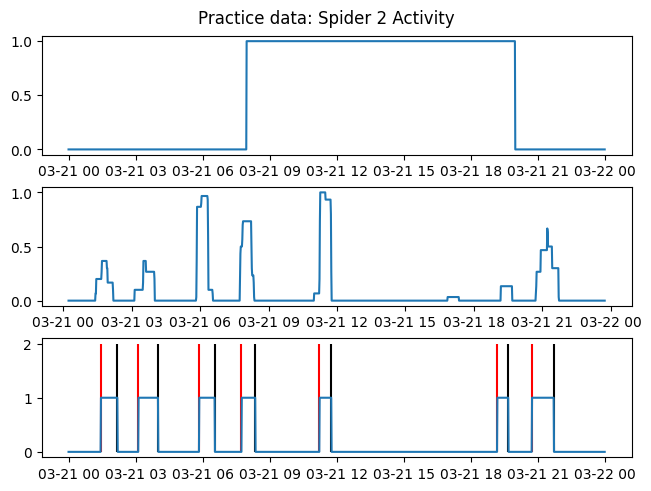

In [24]:
import detect_activity as dt
import matplotlib.pyplot as plt

spider2 = df_1['s3']
spider2_smooth = dt.moving_avg(spider2, 30)

times = dt.interpret_times(df_1['Date_Time'], '%m/%d/%Y %H:%M')
starts, stops = dt.detect_threshold_endpoints(spider2, times)
lights = df_1['Light']

fig, axs = plt.subplots(3, 1, constrained_layout=True)
fig.suptitle('Practice data: Spider 2 Activity')

detect_series = dt.detect_threshold_series(spider2, times)

axs[0].plot(times, lights)
axs[1].plot(times, spider2_smooth)
axs[2].plot(times, [0 for _ in spider2_smooth], color="white")

axs[2].vlines(starts, 0, 2, color="red")
axs[2].vlines(stops, 0, 2, color="black")

/home/thomas/github/spider-circadian-activity/.venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in detect (vectorized)
  outputs = ufunc(*inputs)


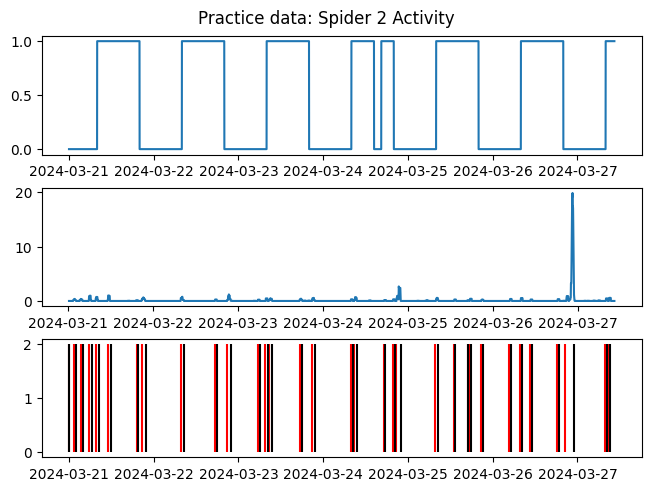

In [ ]:
import detect_activity as dt
import matplotlib.pyplot as plt

spider2 = df_2['s3']
spider2_smooth = dt.moving_avg(spider2, 30)

times = dt.interpret_times(df_2['Date_Time'], '%m/%d/%Y %H:%M')
pairs = dt.detect_threshold_endpoints(spider2_smooth, times)
lights = df_2['Light']

fig, axs = plt.subplots(3, 1, constrained_layout=True)
fig.suptitle('Practice data: Spider 2 Activity')

axs[0].plot(times, lights)
axs[1].plot(times, spider2_smooth)
axs[2].plot(times, [0 for _ in spider2_smooth], color="white")

starts = []
stops = []
for [start, stop] in pairs:
    starts += [start]
    stops += [stop]

axs[2].vlines(starts, 0, 2, color="red")
axs[2].vlines(stops, 0, 2, color="black")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
12270.0


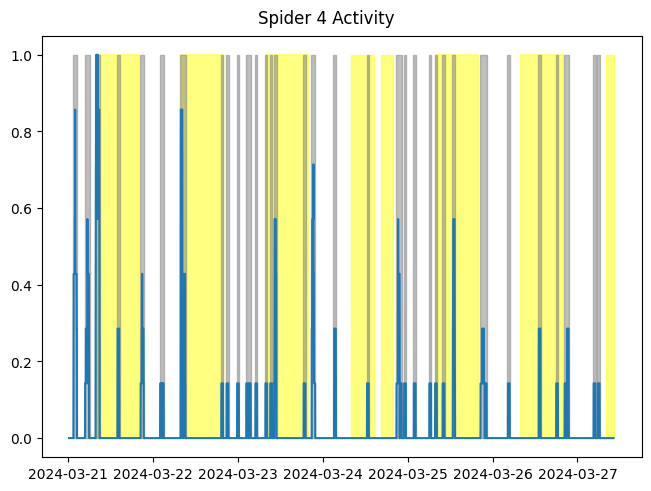

In [29]:
%load_ext autoreload
%autoreload 2
import detect_activity as dt
import detect_activity as dt
import matplotlib.pyplot as plt
import numpy as np

spider2 = df_3['s3']
spider2_smooth = dt.moving_avg(spider2, 30)

spider4 = df_3['s4']
spider4_smooth = dt.moving_avg(spider4, 30)
spider4_max = max(np.nan_to_num(spider4_smooth))

spider5 = df_3['s5']
spider5_smooth = dt.moving_avg(spider5, 30)

times = dt.interpret_times(df_3['Date_Time'], '%m/%d/%Y %H:%M')
starts, stops = dt.detect_threshold_endpoints(spider4_smooth, times)
detect_series = dt.detect_threshold_series(spider4_smooth, times)
lights = df_3['Light']

fig, ax = plt.subplots(1, 1, constrained_layout=True)
fig.suptitle('Spider 4 Activity')


ax.fill_between(times, 0, 1, where=lights, alpha=.5, color="yellow")
ax.fill_between(times, 0, 1, where=detect_series, alpha=.5, color="gray")
ax.plot(times, spider4_smooth / spider4_max)

mean_activity_length = dt.mean_length(pairs)

print(mean_activity_length)